# Data Visualization and Cleaning for NYC AirBnb Data

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.The idea is to understand data which is in hand and to get the basic statistics and idea on how the data is going to be useful in asking specific questions that can be analyzed further using various techniques.

In [1]:
!pip install folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
from folium.plugins import HeatMap

In [2]:
airbnb_df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
airbnb_df.shape

(48895, 16)

Lets get to know the various features that are there in the dataset

In [4]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

We see that apart from ID's of the host and the customer we also get to know the locality in NYC, exact locations, details of the room and the cumulative and the last details of the airbnb.Next, let's see the data type of each of the features-

In [5]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We seet that the the columns are either a object or numbers in data type

To understand the data better we sample 5 elements randomly from the whole dataset to get the idea and types of data that we might encounter

In [6]:
airbnb_df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
37279,29614580,⚡ 3 APT in 1--Large groups Travel & stay toget...,129222253,Andy,Bronx,Williamsbridge,40.87831,-73.86511,Entire home/apt,350,2,3,2019-06-09,0.41,3,323
26689,21211033,Bright Apartment in BedStuy - 20 min from City,12528835,Paula,Brooklyn,Bedford-Stuyvesant,40.68964,-73.95259,Entire home/apt,125,2,11,2019-06-12,0.53,2,0
31707,24725794,"Cozy Basement Studio in the Heart of Harlem, NYC",186905487,Brayan,Manhattan,Harlem,40.80863,-73.95503,Entire home/apt,92,2,68,2019-06-23,4.76,1,32
26209,20898140,"Long Island city, 15 min to Bryant Park",149722669,Robert,Queens,Long Island City,40.76096,-73.93836,Private room,55,4,0,NaN,NaN,1,0
1455,652466,32nd St & Lexington Ave / Doorman Beautiful St...,1475015,Mike,Manhattan,Kips Bay,40.74190,-73.98160,Entire home/apt,100,30,2,2018-06-30,0.04,52,342


Lets look at some of the basic statistics for the data 

In [7]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We can ignore the id's in this case as their statistics wouldn't be useful for us, but apart from that we can get an idea of the mean and other statistics of price, reviews, number of nights and host listings etc.

For our study let's drop the ID's and the last review columns as they give date and ID information only.

In [8]:
airbnb_df=airbnb_df.drop(['id','host_id','last_review'],axis =1)

Let's look at the data which is being missing in various columns and look at strategies on how to handle such data

In [9]:
airbnb_df.isnull().sum()

name                                 16
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We see that the name and host_name columns have very minimal amount of data that are missing and henc can even be dropped from our study. For reviews_per_month, we see that there are over 10000 values missing. One of the ways to tackle such missing data problem is to impute it with it's mean or median.

In [10]:
#dropping rows with missing host_name and name 
airbnb_df=airbnb_df.dropna(subset=['name','host_name'])
airbnb_df

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [11]:
#imputing the median of the data for missing values in reviews_per_month
airbnb_df['reviews_per_month'].fillna((airbnb_df['reviews_per_month']).median(),inplace=True)
airbnb_df

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.72,2,9
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.72,2,36
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.72,1,27
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.72,6,2


In [12]:
airbnb_df.isnull().sum()

name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now, we see that all the data in the dataset is handled and now we can move onto finding the correltaion between columns in the dataset

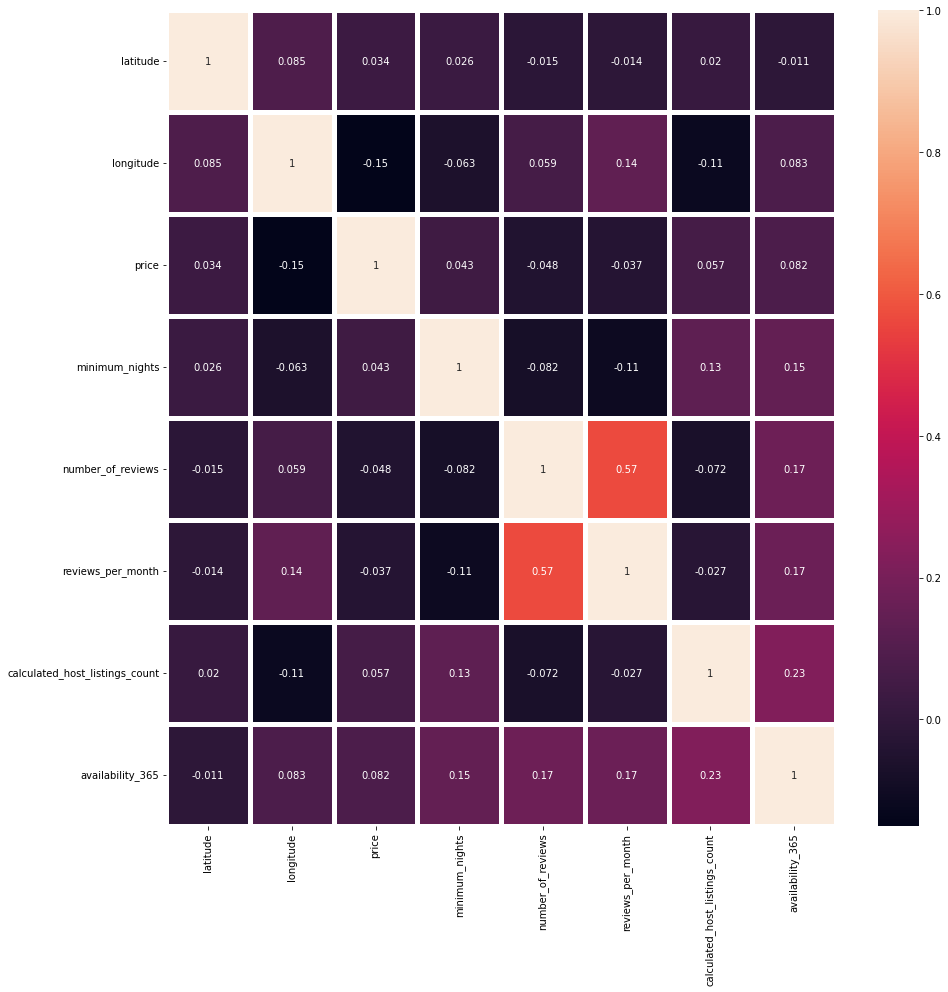

In [13]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(airbnb_df.corr(),annot=True,linewidths=5,ax=ax)
plt.show()

We see that apart from number of reviews and reviews/month which has some amount of correltion which is supposed to have some intuitively, rest all the columns do not seem to have any correlation amongst themselves which is good, since we do not have to drop any columns in this case.

Next, let's look at the histogram of each of the features

/var/folders/c2/tk0nr7k97gs06t559smt6r000000gn/T/ipykernel_3774/2653531302.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  airbnb_df.hist(ax=axs)


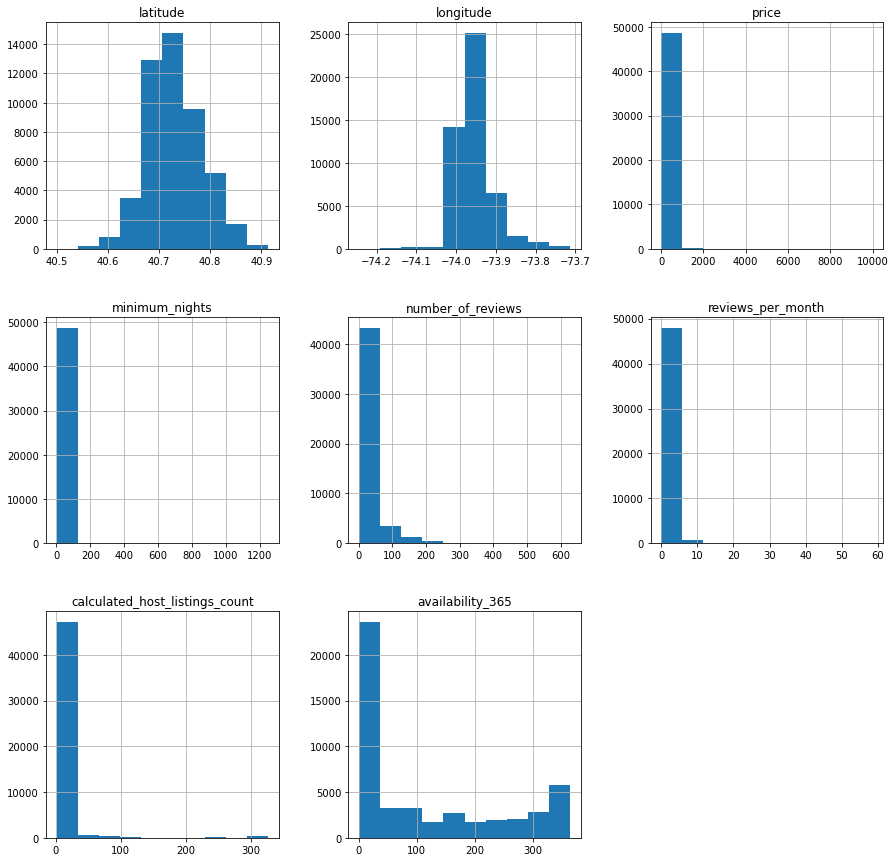

In [14]:
fig = plt.figure(figsize = (15,15))
axs = fig.gca()
airbnb_df.hist(ax=axs)
plt.show()

Now let's see the unique values in each column

In [15]:
airbnb_df.nunique()

name                              47884
host_name                         11450
neighbourhood_group                   5
neighbourhood                       221
latitude                          19039
longitude                         14716
room_type                             3
price                               674
minimum_nights                      108
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

The room_type and neighbourhood_group have limited unique values and can be considered as categorical data

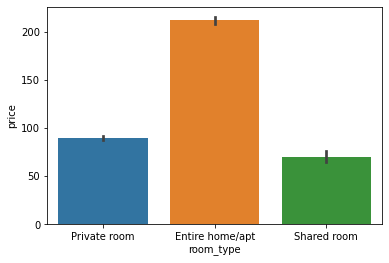

In [39]:
sns.barplot(x='room_type', y="price", data=airbnb_df) 
plt.show()

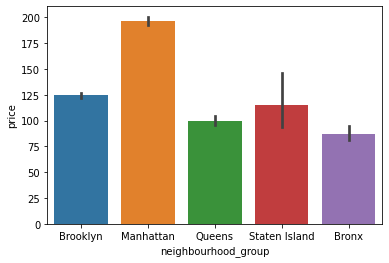

In [36]:
sns.barplot(x='neighbourhood_group', y="price", data=airbnb_df) 
plt.show()

We can see the distribution of cost for different types of room and neighbhourhood groups in NYC above.

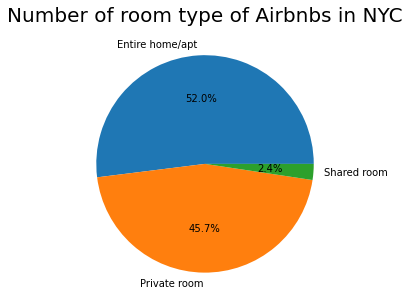

In [18]:
building_type = airbnb_df.room_type.value_counts().index
count = airbnb_df.room_type.value_counts().values

plt.figure(0,figsize = (5,5))
plt.pie(count,labels=building_type, autopct='%1.1f%%')
plt.title('Number of room type of Airbnbs in NYC',fontsize = 20)
plt.show()

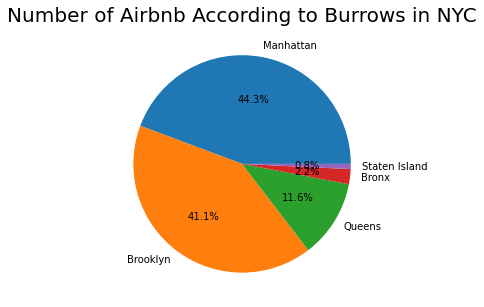

In [19]:
burrows = airbnb_df.neighbourhood_group.value_counts().index
count = airbnb_df.neighbourhood_group.value_counts().values

plt.figure(0,figsize = (5,5))
plt.pie(count,labels=burrows, autopct='%1.1f%%')
plt.title('Number of Airbnb According to Burrows in NYC',fontsize = 20)
plt.show()

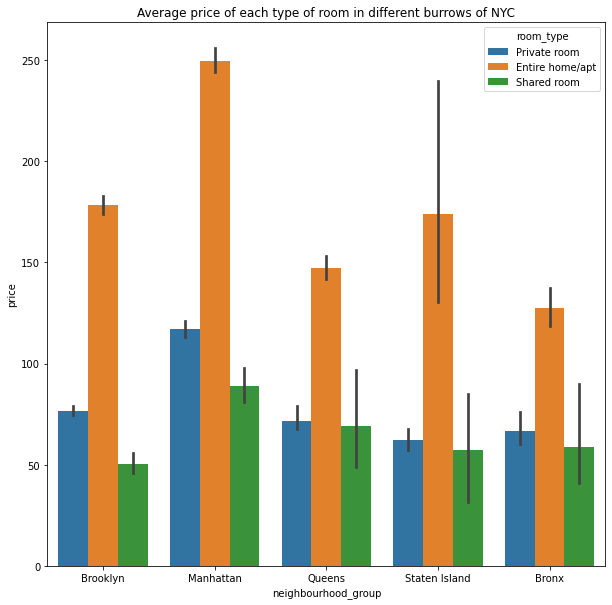

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = airbnb_df)
plt.title('Average price of each type of room in different burrows of NYC')
plt.show()

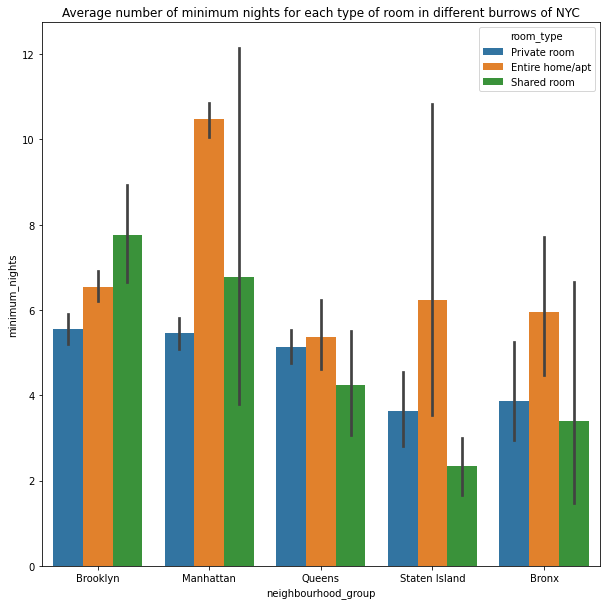

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x = "neighbourhood_group", y = "minimum_nights", hue = "room_type", data = airbnb_df)
plt.title('Average number of minimum nights for each type of room in different burrows of NYC')
plt.show()

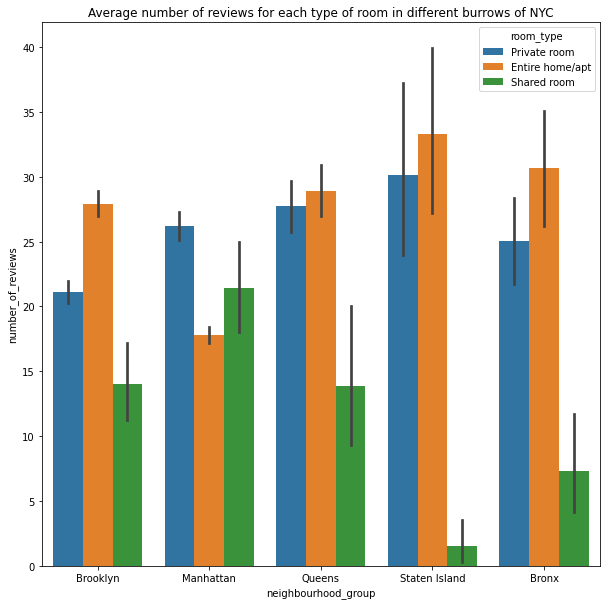

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x = "neighbourhood_group", y = "number_of_reviews", hue = "room_type", data = airbnb_df)
plt.title('Average number of reviews for each type of room in different burrows of NYC')
plt.show()

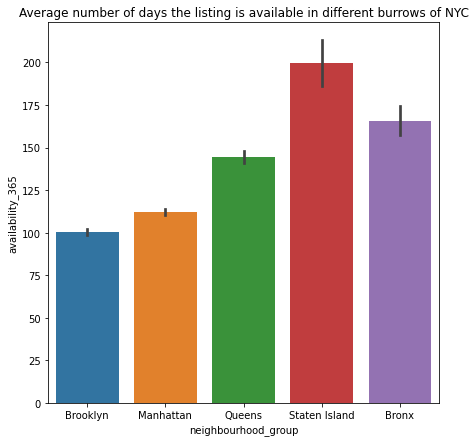

In [23]:
plt.figure(figsize=(7,7))
sns.barplot(x = "neighbourhood_group", y = "availability_365", data = airbnb_df)
plt.title('Average number of days the listing is available in different burrows of NYC')
plt.show()

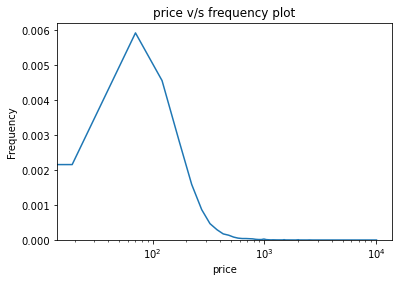

In [24]:
sns.kdeplot(airbnb_df['price'])
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('price v/s frequency plot')
plt.xscale('log')
plt.show()

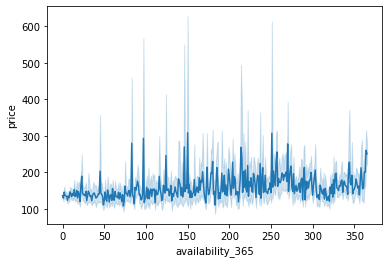

In [25]:
sns.lineplot(x='availability_365',y='price',data=airbnb_df)
plt.show()

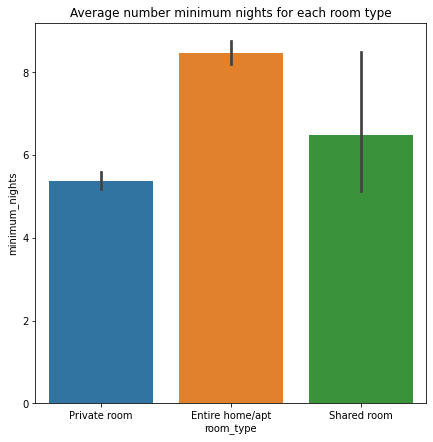

In [26]:
plt.figure(figsize=(7,7))
sns.barplot(x = "room_type", y = "minimum_nights", data = airbnb_df)
plt.title('Average number minimum nights for each room type')
plt.show()

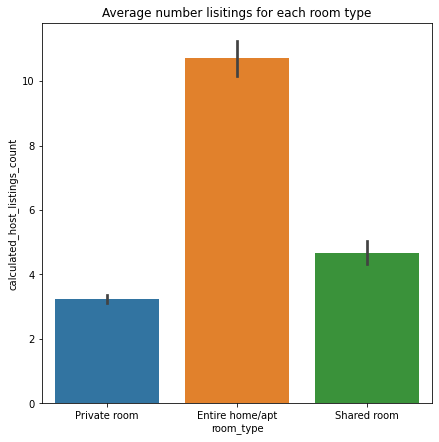

In [27]:
plt.figure(figsize=(7,7))
sns.barplot(x = "room_type", y = "calculated_host_listings_count", data = airbnb_df)
plt.title('Average number lisitings for each room type')
plt.show()

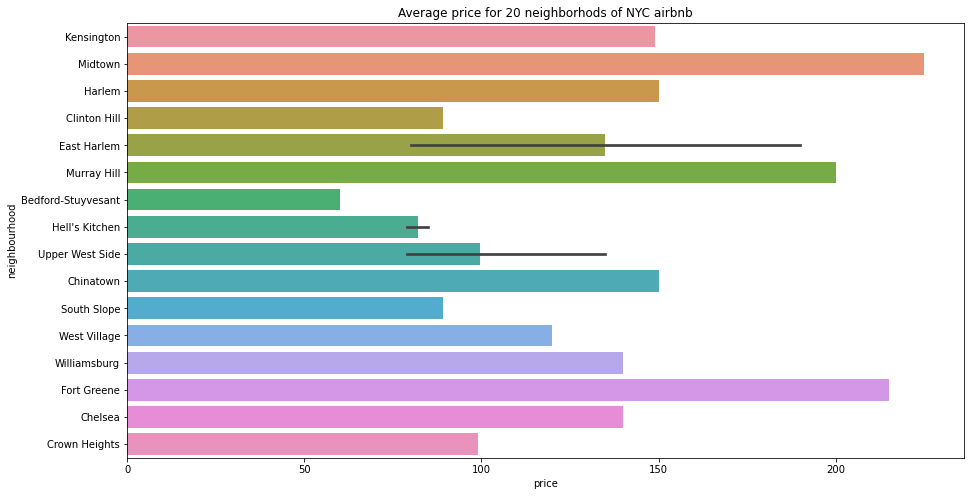

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x=airbnb_df.price[:20], y=airbnb_df.neighbourhood[:20])
plt.title('Average price for 20 neighborhods of NYC airbnb')
plt.show()

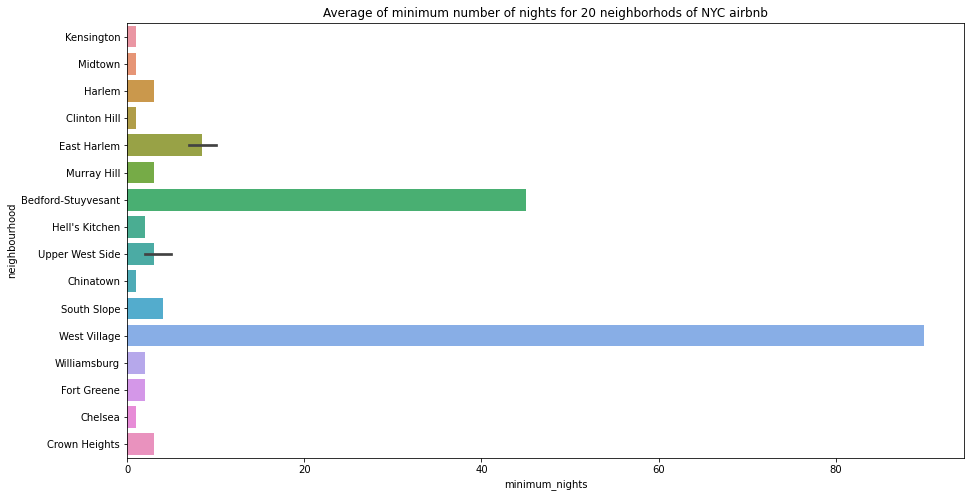

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(x=airbnb_df.minimum_nights[:20], y=airbnb_df.neighbourhood[:20])
plt.title('Average of minimum number of nights for 20 neighborhods of NYC airbnb')
plt.show()

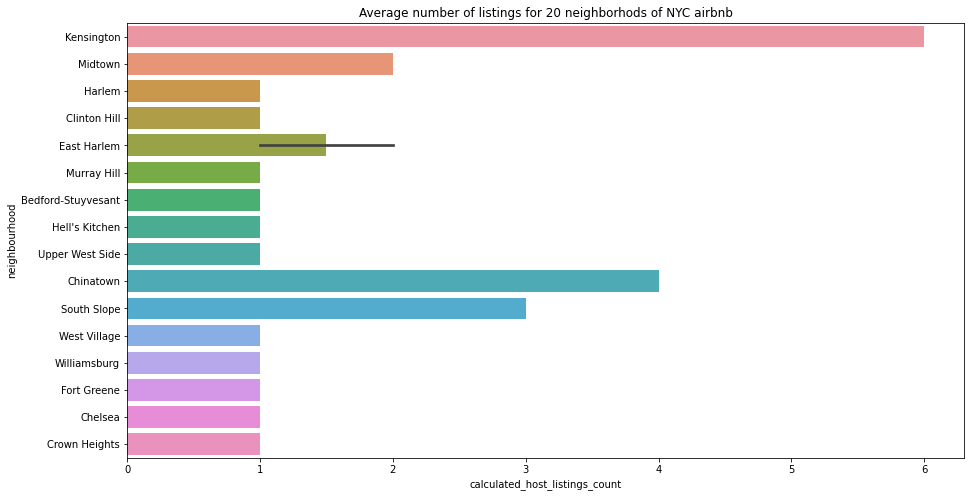

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x=airbnb_df.calculated_host_listings_count[:20], y=airbnb_df.neighbourhood[:20])
plt.title('Average number of listings for 20 neighborhods of NYC airbnb')
plt.show()

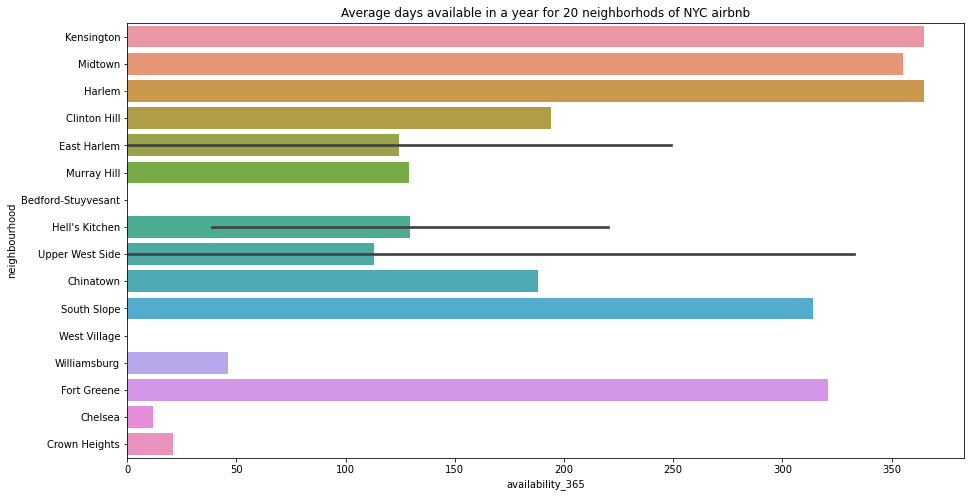

In [31]:

plt.figure(figsize=(15,8))
sns.barplot(x=airbnb_df.availability_365[:20], y=airbnb_df.neighbourhood[:20])
plt.title('Average days available in a year for 20 neighborhods of NYC airbnb')
plt.show()

In [32]:
map_nyc=folium.Map([40.8,-74],zoom_start=10)
HeatMap(airbnb_df[['latitude','longitude']],radius=9,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_nyc)
display(map_nyc)

This map gives us an idea of the distribution of the listings in NYC using a heatmap which gives us a good interactive visualization of the information